In [1]:
import pandas as pd
import numpy as np

In [4]:
data = datapd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
Q1 = data['GrLivArea'].quantile(0.25)
Q3 = data['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
GRLiv_upper_bound = Q3 + 1.5 * IQR

Q1_sale = data['SalePrice'].quantile(0.25)
Q3_sale = data['SalePrice'].quantile(0.75)
IQR_sale = Q3_sale - Q1_sale

# Define the lower and upper bounds for outlier detection
sale_lower_bound = Q1_sale - 1.5 * IQR_sale
sale_upper_bound = Q3_sale + 1.5 * IQR_sale

Text(0.5, 1.0, 'Scatterplot of GrLivArea vs. SalePrice')

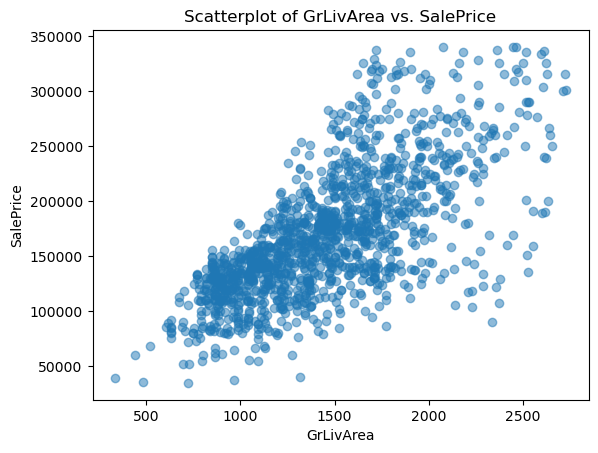

In [9]:
import matplotlib.pyplot as plt

# Use Pandas to filter outliers (you can customize the filtering criteria)
filtered_data = data[(data['GrLivArea'] < GRLiv_upper_bound) & (data['SalePrice'] < sale_upper_bound)]

# Create a scatterplot
plt.scatter(filtered_data['GrLivArea'], filtered_data['SalePrice'], alpha=0.5)

# Set labels and title
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Scatterplot of GrLivArea vs. SalePrice')

In [17]:
X = data[['GrLivArea']]
y = data[['SalePrice']]

In [18]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

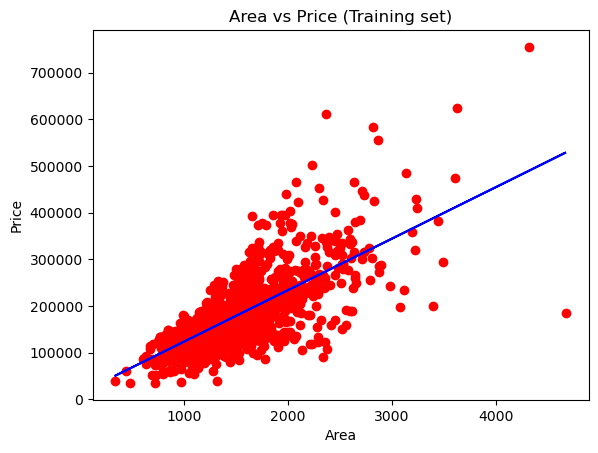

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Area vs Price (Training set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [25]:
y.shape

(1460, 1)

In [26]:
y_pred.shape

(292, 1)

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.433264794803935

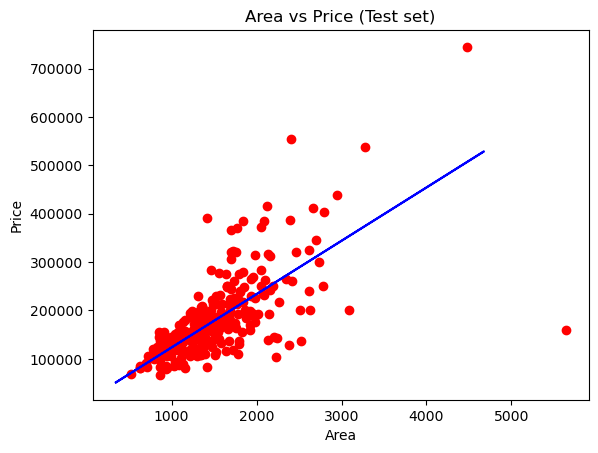

In [29]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Area vs Price (Test set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

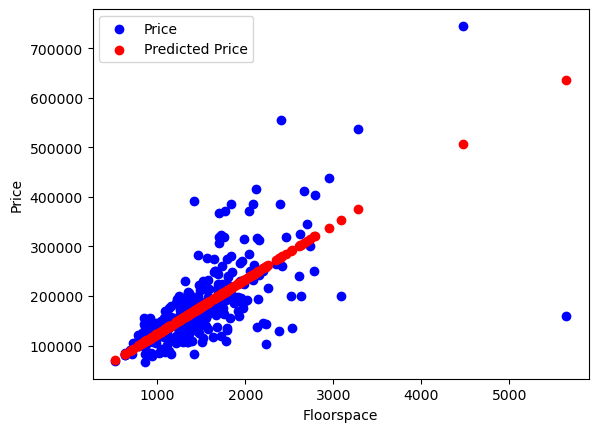

In [32]:
# Create a scatterplot for floorspace vs. price
plt.scatter(X_test, y_test, c='blue', label='Price')

# Add a scatterplot for floorspace vs. predicted price
plt.scatter(X_test, y_pred, c='red', label='Predicted Price')

# Set labels and legend
plt.xlabel('Floorspace')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()


In [37]:
numeric_features = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') 

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 



In [38]:
# Specify the threshold for acceptable correlation
correlation_threshold = 0.5

In [39]:
# Find highly correlated variables to the target variable (e.g., 'price')
target_variable = 'SalePrice'
highly_correlated_variables = correlation_matrix[(correlation_matrix[target_variable] > correlation_threshold) & (correlation_matrix[target_variable] < 1)]

# Filter out variables that are too correlated with the floor area variable (e.g., 'floorspace')
floor_area_variable = 'GrLivArea'
filtered_variables = highly_correlated_variables[(highly_correlated_variables[floor_area_variable] < 0.5) & (highly_correlated_variables.index != floor_area_variable)]


In [40]:
best_variable = filtered_variables[target_variable].idxmax()

# Print the best variable
print(f"The best variable with a correlation of {correlation_matrix[target_variable][best_variable]} is '{best_variable}'.")


The best variable with a correlation of 0.6404091972583521 is 'GarageCars'.


In [43]:
X = data[['GrLivArea', 'GarageCars']]
y = data[['SalePrice']]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = regressor.predict(X_test)

r2_multi = r2_score(y_test, y_pred)
r2_multi

0.5673074427564696

In [57]:
print('Intercept : ',regressor.intercept_)
print('Coefficient : ',regressor.coef_)

Intercept :  [-16294.51]
Coefficient :  [[   79.66 42962.3 ]]


## Exercise 2: Linear regression to analyse relationships between crimes and socioeconomic characteristics

In [56]:
df = pd.read_csv('censusCrimeClean.csv')
df

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [91]:
X = df[['medIncome']]
y = df[['ViolentCrimesPerPop']]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [93]:
model.fit(X_train, y_train)

LinearRegression()

In [87]:
X.shape

(1994, 1)

In [77]:
y_pred = model.predict(X_test)

In [78]:
# Display the model parameters
print(f'Intercept (theta_0): {model.intercept_}')
print(f'Slope (theta_1): {model.coef_[0]}')

Intercept (theta_0): [0.41]
Slope (theta_1): [-0.48]


In [79]:
intercept = model.intercept_
coefficients = model.coef_

In [116]:
X = df['medIncome']
y = df['ViolentCrimesPerPop']

In [97]:
# Fit a linear regression model to get the coefficients
coefficients = np.polyfit(X, y, 1)

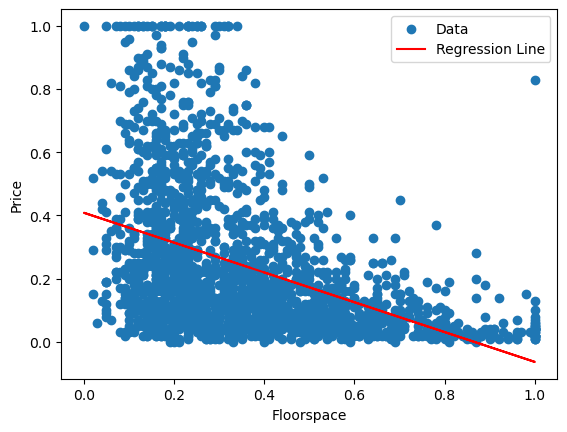

In [98]:
# Calculate the regression line using polyval
regression_line = np.polyval(coefficients, X)

# Plot the original data and the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, regression_line, label='Regression Line', color='red')
plt.xlabel('Floorspace')
plt.ylabel('Price')
plt.legend()
plt.show()

In [103]:
modelledDependent = np.polyval([model.coef_[0], model.intercept_], y)

ValueError: x and y must be the same size

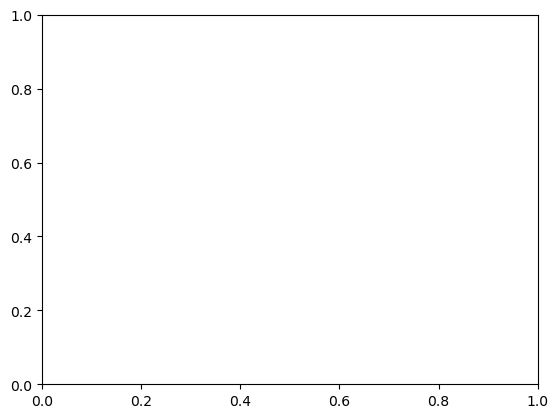

In [134]:
plt.scatter(X, modelledDependent, label='Data')
plt.plot(X, modelledDependent, label='Regression Line', color='red')
plt.xlabel('Floorspace')
plt.ylabel('Price')
plt.legend()
plt.show()

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [128]:
X = df[['medIncome','population']]
y = df[['ViolentCrimesPerPop']]

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [131]:
results = model.fit(X_train, y_train)

In [137]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
results.params

const         0.360468
medIncome    -0.435059
population    0.601127
dtype: float64